___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

"***Employee Churn Analysis Project***". 

In this project, we will examine what Employee Churn is, and how it is different from customer churn.

Different classification algorithms will be implemented to make predictions. 

At the end of the project, we will deploy your model using *Streamlit*.

In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

Variables of this dataset are as follows:

- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left the company or not.


## 1. Exploratory Data Analysis

Exploratory Data Analysis is an initial process of analysis, in which we can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.

### Importing Modules

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split,cross_val_score
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ClassPredictionError
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

Let's first load the required HR dataset using pandas's "read_csv" function.

In [44]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [45]:
'''!pip install autoviz
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
filename = ""
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="left",
    dfte=df,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=20000,
    max_cols_analyzed=50,
)'''

'!pip install autoviz\nfrom autoviz.AutoViz_Class import AutoViz_Class\nAV = AutoViz_Class()\nfilename = ""\nsep = ","\ndft = AV.AutoViz(\n    filename,\n    sep=",",\n    depVar="left",\n    dfte=df,\n    header=0,\n    verbose=0,\n    lowess=False,\n    chart_format="svg",\n    max_rows_analyzed=20000,\n    max_cols_analyzed=50,\n)'

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


In [48]:
# Let's first check for any duplicate records
print(f'Duplicate items in this dataset is: {df.duplicated().sum()}')

Duplicate items in this dataset is: 3008


In [49]:
df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [50]:
df[(df['satisfaction_level']== 0.46) & (df['average_montly_hours']== 139) & (df['last_evaluation']== 0.57)]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
23,0.46,0.57,2,139,3,0,1,0,sales,low
396,0.46,0.57,2,139,3,0,1,0,sales,low
12023,0.46,0.57,2,139,3,0,1,0,sales,low
12396,0.46,0.57,2,139,3,0,1,0,sales,low
14234,0.46,0.57,2,139,3,0,1,0,sales,low
14607,0.46,0.57,2,139,3,0,1,0,sales,low


In [51]:
print('Number of unique Salary: {}'.format(len(df.salary.unique())))
print('Number of unique Department: {}'.format(len(df.Department.unique())))

Number of unique Salary: 3
Number of unique Department: 10


In [52]:
df.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### Data Visualization & Insights

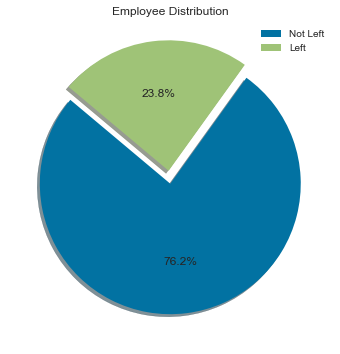

In [53]:
plt.figure(figsize=(6,6))
explode = [0,0.1]
plt.pie(df['left'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Not Left','Left'])
plt.title('Employee Distribution')
plt.axis('off');

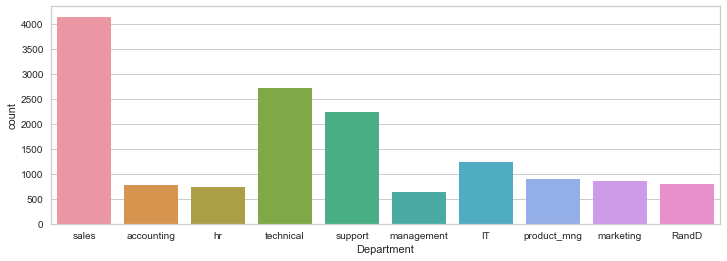

In [54]:
fig = plt.figure(figsize=(12,4))
sns.countplot(x='Department',data=df)
plt.show();

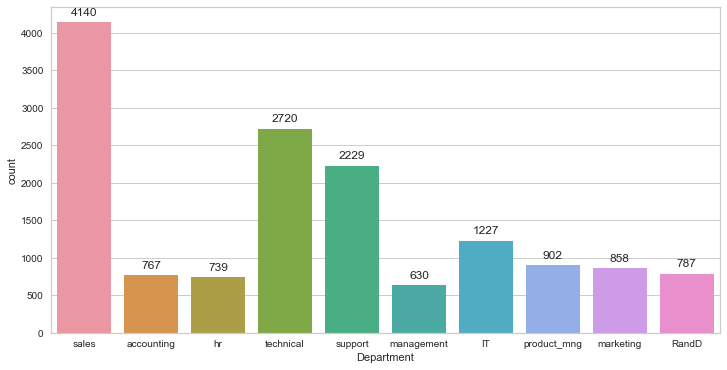

In [55]:
plt.figure(figsize=(12, 6))
vizz=sns.countplot('Department',data=df)
for p in vizz.patches:
    vizz.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [56]:
# fig, ax = plt.subplots( figsize=(12, 7))
# g = sns.countplot(x = 'sales',order=df.sales.value_counts().index, data = df)
# for p in g.patches:
   # g.annotate((p.get_height()), (p.get_x()+0.2, p.get_height()+50))

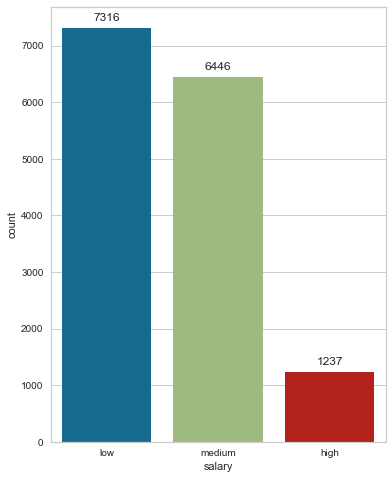

In [57]:
plt.figure(figsize=(6, 8))
vizz=sns.countplot('salary',data=df)
for p in vizz.patches:
    vizz.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

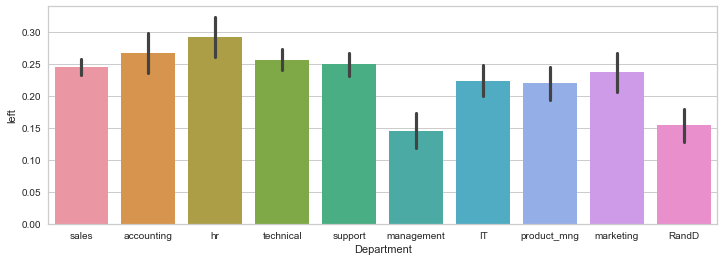

In [58]:
fig = plt.figure(figsize=(12,4))
sns.barplot(x='Department',y='left',data=df)
plt.show();

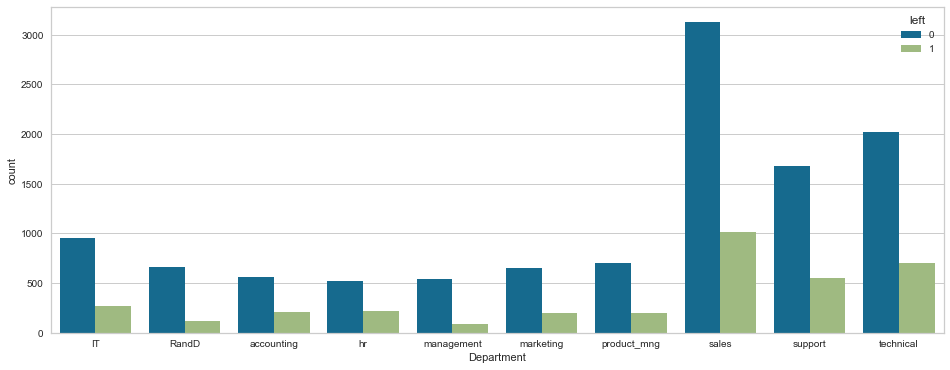

In [59]:
plt.figure(figsize=(16,6))
subgrade_order = sorted(df['Department'].unique())
sns.countplot(x='Department',data=df,order = subgrade_order,hue='left');

In [60]:
dept_left = ['Department', 'left']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[dept_left[0]], df[dept_left[1]]).style.background_gradient(cmap = cm)

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


In [61]:
salary_left = ['salary', 'left']
cm = sns.light_palette("orange", as_cmap=True)
pd.crosstab(df[salary_left[0]], df[salary_left[1]]).style.background_gradient(cmap = cm)

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


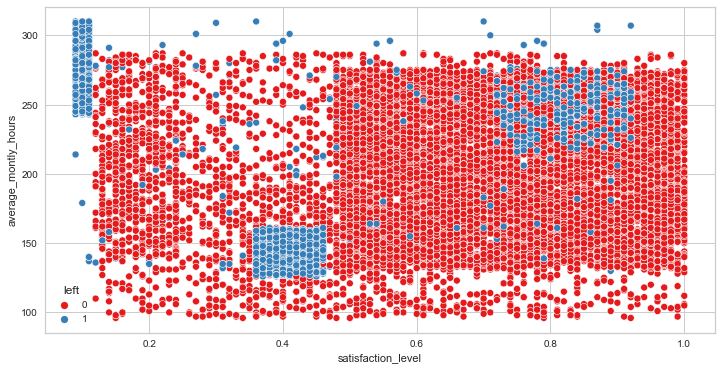

In [62]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df['satisfaction_level'],y=df['average_montly_hours'],hue=df['left'],palette='Set1')
plt.show();

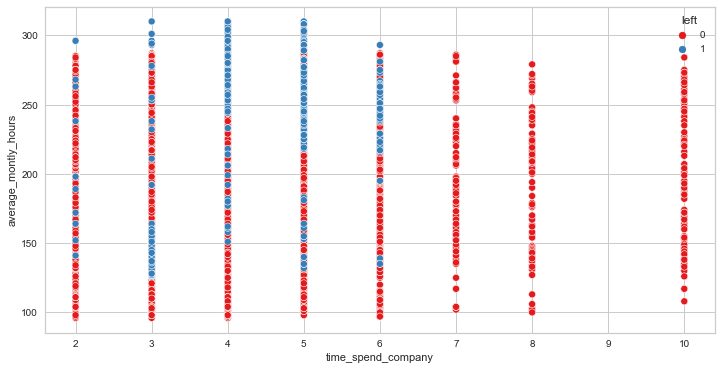

In [63]:
plt.figure(figsize=[12,6])
sns.scatterplot(x=df['time_spend_company'],y=df['average_montly_hours'],hue=df['left'],palette='Set1')
plt.show();

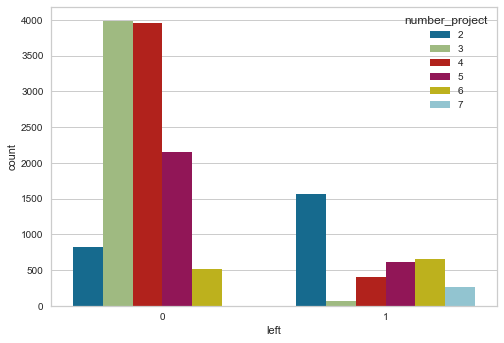

In [64]:
sns.countplot('left', data = df, hue = 'number_project');

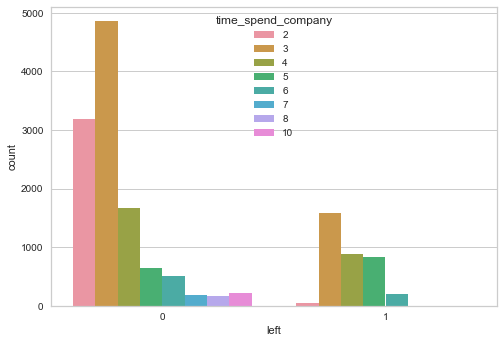

In [65]:
sns.countplot('left', data = df, hue = 'time_spend_company');

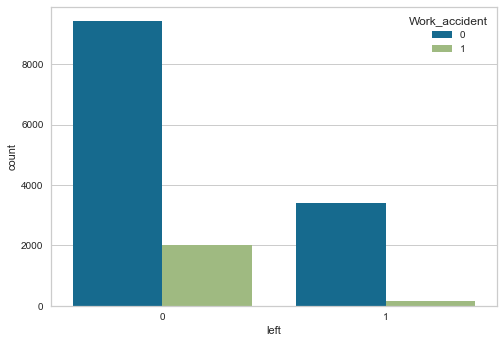

In [66]:
sns.countplot('left', data = df, hue = 'Work_accident');

In [67]:
df['productivity'] = df['number_project'] / df['time_spend_company']
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,productivity
0,0.38,0.53,2,157,3,0,1,0,sales,low,0.666667
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0.833333
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1.750000
3,0.72,0.87,5,223,5,0,1,0,sales,low,1.000000
4,0.37,0.52,2,159,3,0,1,0,sales,low,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,0.666667
14995,0.37,0.48,2,160,3,0,1,0,support,low,0.666667
14996,0.37,0.53,2,143,3,0,1,0,support,low,0.666667
14997,0.11,0.96,6,280,4,0,1,0,support,low,1.500000


### Missing Value Detection

In [68]:
def missing_values(df):
        mis_val = df.isnull().sum()        
        mis_val_percent = 100 * df.isnull().sum() / len(df)        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)        
        mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})        
        mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)        
        print ("Dataframe has " + str(df.shape[1]) + " columns.\n"+"There are " + str(mis_val_table_ren_columns.shape[0]) +" columns that have missing values.")        
        return mis_val_table_ren_columns
    
missing_values(df)

Dataframe has 11 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Outlier Detection

In [69]:
num_features = df[['satisfaction_level','last_evaluation','average_montly_hours','time_spend_company','productivity']]
num_features

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity
0,0.38,0.53,157,3,0.666667
1,0.80,0.86,262,6,0.833333
2,0.11,0.88,272,4,1.750000
3,0.72,0.87,223,5,1.000000
4,0.37,0.52,159,3,0.666667
...,...,...,...,...,...
14994,0.40,0.57,151,3,0.666667
14995,0.37,0.48,160,3,0.666667
14996,0.37,0.53,143,3,0.666667
14997,0.11,0.96,280,4,1.500000


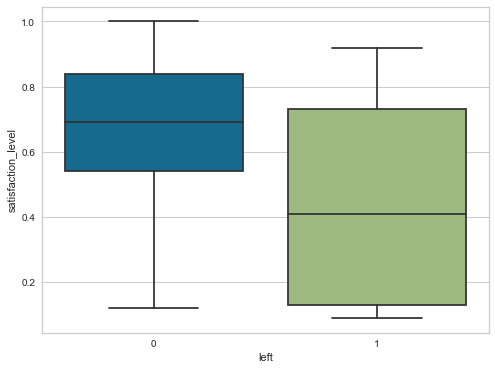

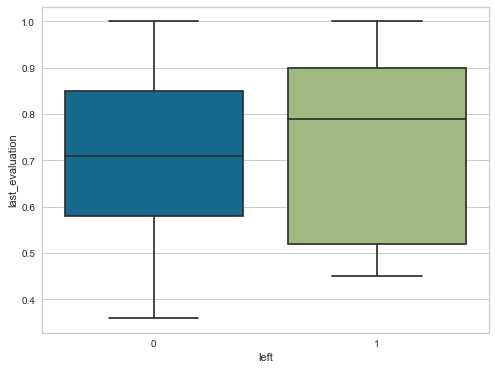

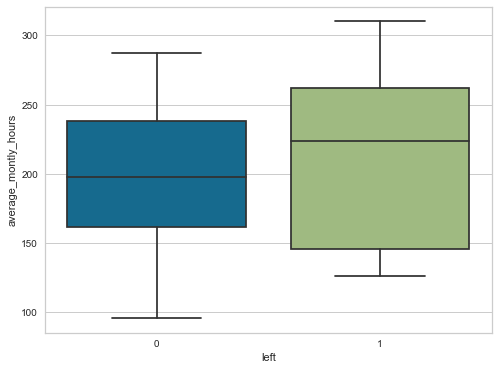

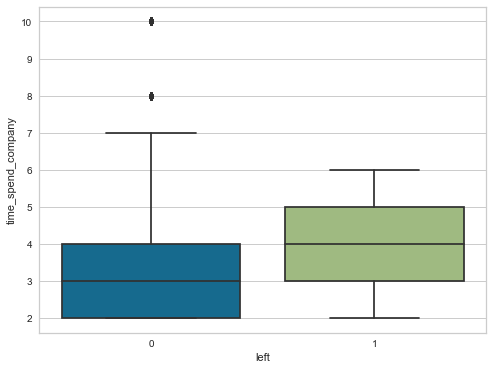

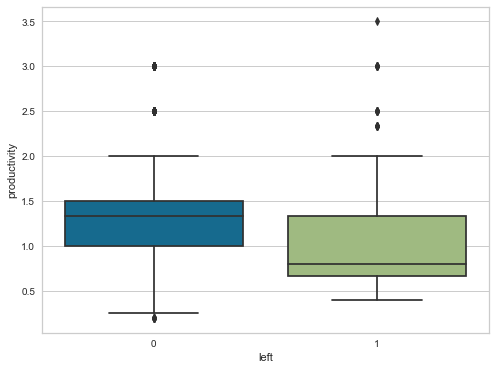

In [70]:
for i in num_features.columns:
    plt.figure(i,figsize=(8,6))
    sns.boxplot(x=df['left'], y=num_features[i], data=df);

In [71]:
def detect_outliers(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

for col in num_features:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))

There are 376 outliers in time_spend_company


In [72]:
df['time_spend_company'].describe()

count    14999.000000
mean         3.498233
std          1.460136
min          2.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: time_spend_company, dtype: float64

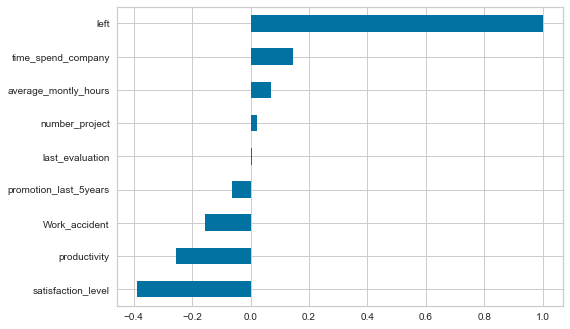

In [73]:
df.corr()["left"].sort_values().plot.barh();

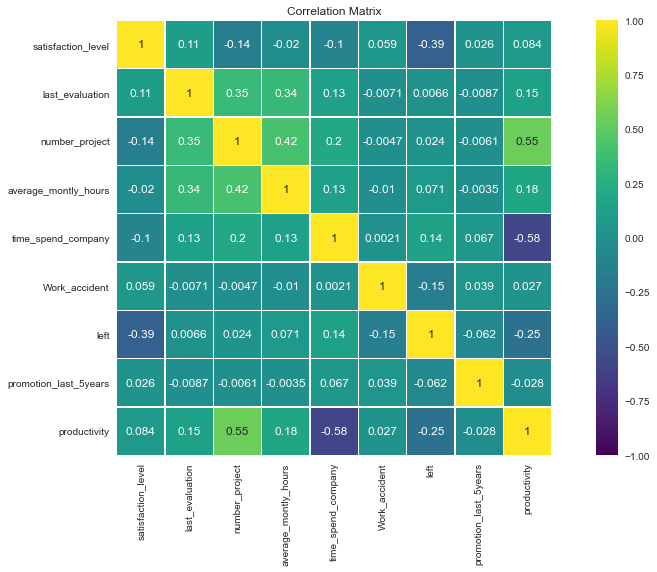

In [74]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix")
plt.show();

## 3. Data Pre-Processing

#### Scaling

Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Also distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

Scaling Types:
- Normalization: Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

- Standardization: Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

    

In [75]:
num_features

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity
0,0.38,0.53,157,3,0.666667
1,0.80,0.86,262,6,0.833333
2,0.11,0.88,272,4,1.750000
3,0.72,0.87,223,5,1.000000
4,0.37,0.52,159,3,0.666667
...,...,...,...,...,...
14994,0.40,0.57,151,3,0.666667
14995,0.37,0.48,160,3,0.666667
14996,0.37,0.53,143,3,0.666667
14997,0.11,0.96,280,4,1.500000


In [76]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_num_df= scaler.fit_transform(num_features)
scaled_num_df=pd.DataFrame(scaled_num_df)
scaled_num_df.columns=num_features.columns
scaled_num_df

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity
0,0.318681,0.265625,0.285047,0.125,0.141414
1,0.780220,0.781250,0.775701,0.500,0.191919
2,0.021978,0.812500,0.822430,0.250,0.469697
3,0.692308,0.796875,0.593458,0.375,0.242424
4,0.307692,0.250000,0.294393,0.125,0.141414
...,...,...,...,...,...
14994,0.340659,0.328125,0.257009,0.125,0.141414
14995,0.307692,0.187500,0.299065,0.125,0.141414
14996,0.307692,0.265625,0.219626,0.125,0.141414
14997,0.021978,0.937500,0.859813,0.250,0.393939


#### Label Encoding

Lots of machine learning algorithms require numerical input data, so you need to represent categorical columns in a numerical column. In order to encode this data, you could map each value to a number. e.g. Salary column's value can be represented as low:0, medium:1, and high:2. This process is known as label encoding, and sklearn conveniently will do this for you using LabelEncoder.



In [77]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["salary"] = le.fit_transform(df["salary"])
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,productivity
0,0.38,0.53,2,157,3,0,1,0,sales,1,0.666667
1,0.80,0.86,5,262,6,0,1,0,sales,2,0.833333
2,0.11,0.88,7,272,4,0,1,0,sales,2,1.750000
3,0.72,0.87,5,223,5,0,1,0,sales,1,1.000000
4,0.37,0.52,2,159,3,0,1,0,sales,1,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1,0.666667
14995,0.37,0.48,2,160,3,0,1,0,support,1,0.666667
14996,0.37,0.53,2,143,3,0,1,0,support,1,0.666667
14997,0.11,0.96,6,280,4,0,1,0,support,1,1.500000


In [78]:
final_df=pd.concat([scaled_num_df, pd.get_dummies(df.Department, drop_first = True, prefix='Dept', prefix_sep='_'), df[['salary', 'Work_accident', 'promotion_last_5years', 'left']]],axis=1)
final_df

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,salary,Work_accident,promotion_last_5years,left
0,0.318681,0.265625,0.285047,0.125,0.141414,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0.780220,0.781250,0.775701,0.500,0.191919,0,0,0,0,0,0,1,0,0,2,0,0,1
2,0.021978,0.812500,0.822430,0.250,0.469697,0,0,0,0,0,0,1,0,0,2,0,0,1
3,0.692308,0.796875,0.593458,0.375,0.242424,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.307692,0.250000,0.294393,0.125,0.141414,0,0,0,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.340659,0.328125,0.257009,0.125,0.141414,0,0,0,0,0,0,0,1,0,1,0,0,1
14995,0.307692,0.187500,0.299065,0.125,0.141414,0,0,0,0,0,0,0,1,0,1,0,0,1
14996,0.307692,0.265625,0.219626,0.125,0.141414,0,0,0,0,0,0,0,1,0,1,0,0,1
14997,0.021978,0.937500,0.859813,0.250,0.393939,0,0,0,0,0,0,0,1,0,1,0,0,1


In [79]:
print(f'Duplicate items in this dataset is: {final_df.duplicated().sum()}')

Duplicate items in this dataset is: 3008


In [80]:
# Drop duplicate records
final_df = final_df[~final_df.duplicated()]
final_df.head()

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,productivity,Dept_RandD,Dept_accounting,Dept_hr,Dept_management,Dept_marketing,Dept_product_mng,Dept_sales,Dept_support,Dept_technical,salary,Work_accident,promotion_last_5years,left
0,0.318681,0.265625,0.285047,0.125,0.141414,0,0,0,0,0,0,1,0,0,1,0,0,1
1,0.780220,0.781250,0.775701,0.500,0.191919,0,0,0,0,0,0,1,0,0,2,0,0,1
2,0.021978,0.812500,0.822430,0.250,0.469697,0,0,0,0,0,0,1,0,0,2,0,0,1
3,0.692308,0.796875,0.593458,0.375,0.242424,0,0,0,0,0,0,1,0,0,1,0,0,1
4,0.307692,0.250000,0.294393,0.125,0.141414,0,0,0,0,0,0,1,0,0,1,0,0,1


In [81]:
final_df.shape

(11991, 18)

## 4. Cluster Analysis

- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters). It is a main task of exploratory data mining, and a common technique for statistical data analysis, used in many fields, including pattern recognition, image analysis, information retrieval, bioinformatics, data compression, computer graphics and machine learning.

    [Cluster Analysis](https://en.wikipedia.org/wiki/Cluster_analysis)

    [Cluster Analysis2](https://realpython.com/k-means-clustering-python/)

#### The Elbow Method

- "Elbow Method" can be used to find the optimum number of clusters in cluster analysis. The elbow method is used to determine the optimal number of clusters in k-means clustering. The elbow method plots the value of the cost function produced by different values of k. If k increases, average distortion will decrease, each cluster will have fewer constituent instances, and the instances will be closer to their respective centroids. However, the improvements in average distortion will decline as k increases. The value of k at which improvement in distortion declines the most is called the elbow, at which we should stop dividing the data into further clusters.

    [The Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)

    [The Elbow Method2](https://medium.com/@mudgalvivek2911/machine-learning-clustering-elbow-method-4e8c2b404a5d)

    [KMeans](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)

Let's find out the groups of employees who left. You can observe that the most important factor for any employee to stay or leave is satisfaction and performance in the company. So let's bunch them in the group of people using cluster analysis.

In [82]:
df_cluster = final_df.copy()
df_cluster = df_cluster[['satisfaction_level', 'productivity', 'time_spend_company']]
df_cluster.head()

,satisfaction_level,productivity,time_spend_company
0,0.318681,0.141414,0.125
1,0.780220,0.191919,0.500
2,0.021978,0.469697,0.250
3,0.692308,0.242424,0.375
4,0.307692,0.141414,0.125


In [83]:
from pyclustertend import hopkins
hopkins(df_cluster, df_cluster.shape[0])

0.0038347367502107607

In [84]:
from sklearn.metrics import silhouette_samples,silhouette_score
ssd =[]
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(df_cluster)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(df_cluster, model.labels_)}')

NameError: name 'KMeans' is not defined

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(df_cluster)
visu.poof();

In [ ]:
k_means =KMeans(n_clusters=5).fit(df_cluster)
labels = k_means.labels_
df_cluster['cluster_id'] = labels
df_cluster.head()

In [ ]:
import plotly.graph_objs as go
import plotly as py
py.offline.init_notebook_mode(connected = True)
df_cluster['cluster_id'] =  k_means.labels_
trace1 = go.Scatter3d(
    x = df_cluster['satisfaction_level'],
    y = df_cluster['productivity'],
    z = df_cluster['time_spend_company'],
    mode ='markers',
    marker = dict(color = df_cluster['cluster_id'], size = 6, line = dict(color= df_cluster['cluster_id'], width= 12), opacity = 0.8)) 
data = [trace1]
layout = go.Layout(title= 'Employee Segmentation', scene = dict(xaxis = dict(title  = 'satisfaction_level'), yaxis = dict(title  = 'productivity'), zaxis = dict(title  = 'time_spend_company')))
fig = go.Figure(data = data, layout=layout)
py.offline.iplot(fig)
plt.show();

In [ ]:
plt.title("KMeans clusters with the number of Employees")
plt.xlabel("clusters")
plt.ylabel("Count")
df_cluster.cluster_id.value_counts().plot(kind='bar');

In [ ]:
df_cluster.groupby(df_cluster.cluster_id).mean().plot(kind='bar')
plt.show();

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data = df_cluster, x='satisfaction_level', y='productivity', hue='cluster_id');

## 5. Model Building

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV,train_test_split,cross_val_score
import itertools
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.preprocessing import scale,StandardScaler, MinMaxScaler,Normalizer,RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix, ClassPredictionError
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 

### Evaluating Model Performance

- Confusion Matrix : You can use scikit-learn metrics module for accuracy calculation. A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.

    [Confusion Matrix](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

- Yellowbrick: Yellowbrick is a suite of visualization and diagnostic tools that will enable quicker model selection. It’s a Python package that combines scikit-learn and matplotlib. Some of the more popular visualization tools include model selection, feature visualization, classification and regression visualization

    [Yellowbrick](https://www.analyticsvidhya.com/blog/2018/05/yellowbrick-a-set-of-visualization-tools-to-accelerate-your-model-selection-process/)

### Split Data as Train and Test Set

In [86]:
X = final_df.drop('left', axis = 1)
y = final_df['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state=42)

### Gradient Boosting Classifier

#### Model Building

In [87]:
gbm = GradientBoostingClassifier()

gbm_cv_scores = cross_val_score(estimator=gbm, X=X_train, y=y_train, cv=10)
gbm_cv_accuracy_score = gbm_cv_scores.mean()
gbm_cv_accuracy_score

0.9803409671377489

In [89]:
gbm.fit(X_train, y_train)
y_pred = gbm.predict(X_test)

In [92]:
gbm_f1 = f1_score(y_test, y_pred, average='macro')
gbm_f1

0.9664110640315436

#### Evaluating Model Performance

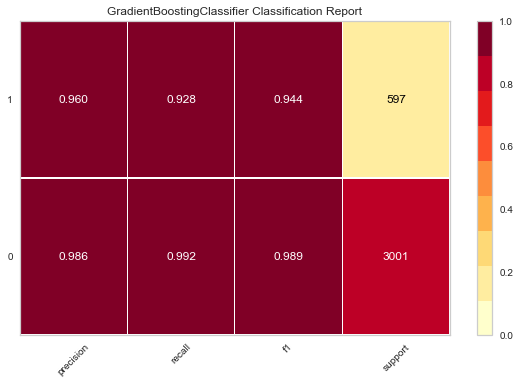

In [93]:
visualizer = ClassificationReport(gbm, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

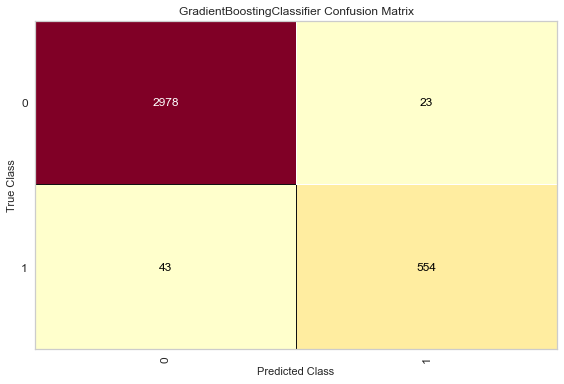

In [94]:
cm = ConfusionMatrix(gbm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

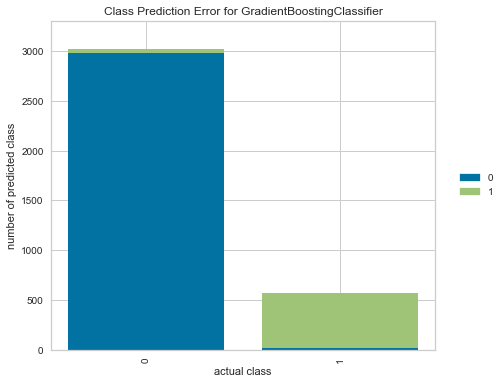

In [95]:
visualizer = ClassPredictionError(gbm)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show();

#### Prediction

### KNeighbors Classifier

#### Model Building

In [96]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

knn_cv_scores = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)
knn_cv_accuracy_score = knn_cv_scores.mean()
knn_cv_accuracy_score

0.9418550996083773

In [97]:
knn_f1 = f1_score(y_test, y_pred, average='macro')
knn_f1

0.9134673356198901

#### Evaluating Model Performance

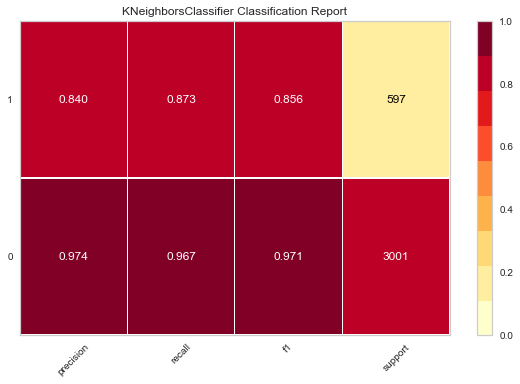

In [98]:
visualizer = ClassificationReport(knn, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

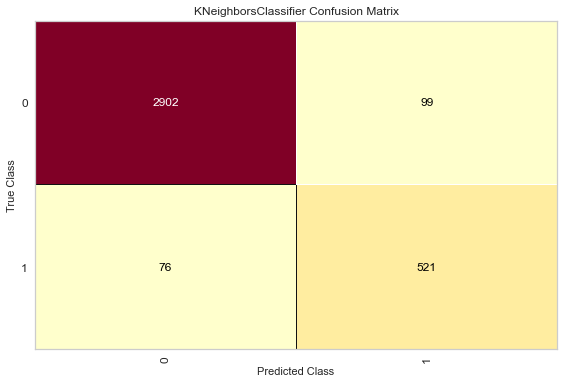

In [99]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

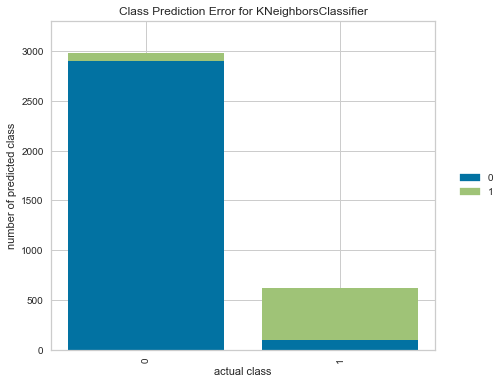

In [100]:
visualizer = ClassPredictionError(knn)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show();

#### Prediction

### Random Forest Classifier

#### Model Building

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_cv_scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
rf_cv_accuracy_score = rf_cv_scores.mean()
rf_cv_accuracy_score

0.983081190759975

In [102]:
rf_f1 = f1_score(y_test, y_pred, average='macro')
rf_f1

0.9737009224842366

#### Evaluating Model Performance

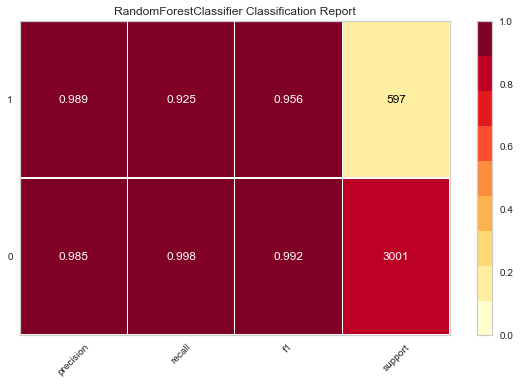

In [103]:
visualizer = ClassificationReport(rf, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

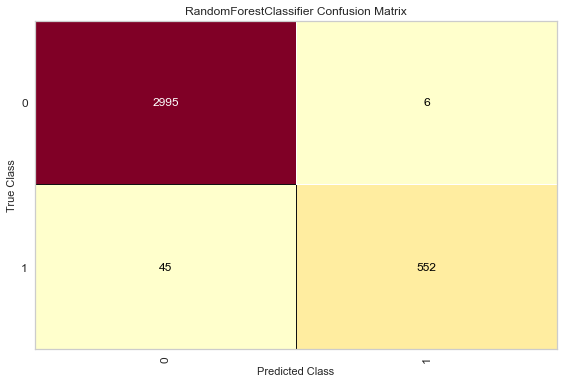

In [104]:
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

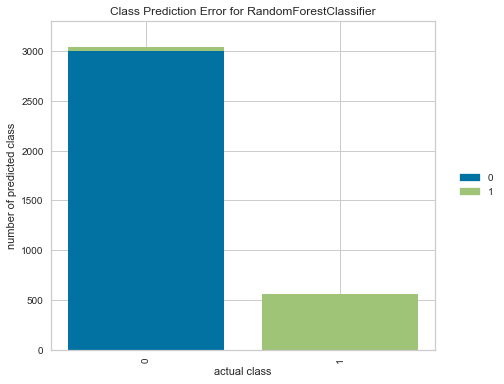

In [105]:
visualizer = ClassPredictionError(rf)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show();

### Decision Tree Classifier

#### Model Building

In [106]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

dt_cv_scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=10)
dt_cv_accuracy_score = dt_cv_scores.mean()
dt_cv_accuracy_score

0.9706898802429198

In [107]:
dt_f1 = f1_score(y_test, y_pred, average='macro')
dt_f1

0.9380285913137512

#### Evaluating Model Performance

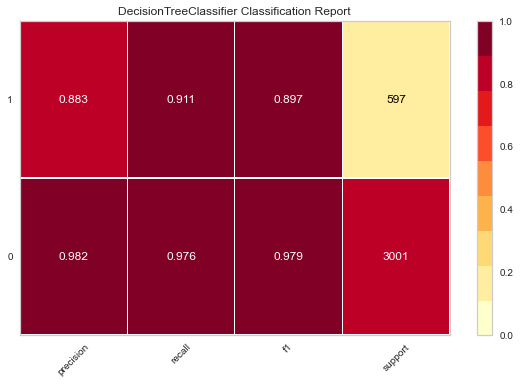

In [108]:
visualizer = ClassificationReport(dt, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

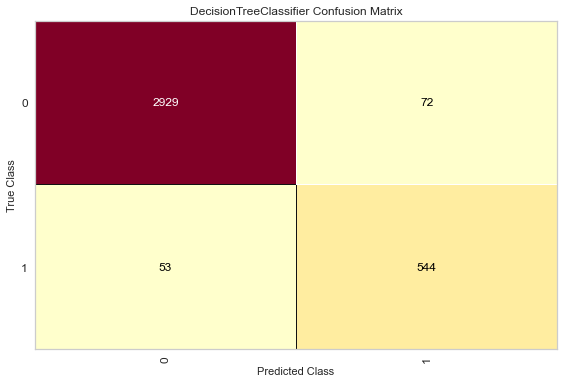

In [109]:
cm = ConfusionMatrix(dt)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

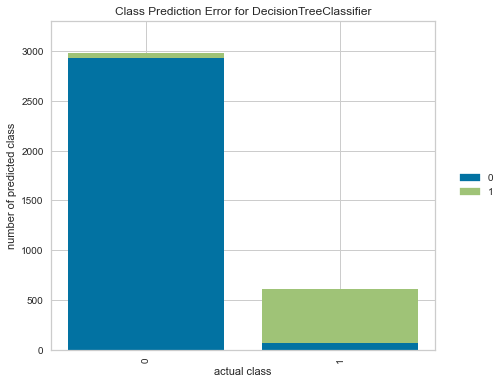

In [110]:
visualizer = ClassPredictionError(dt)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show();

### Model Comparison

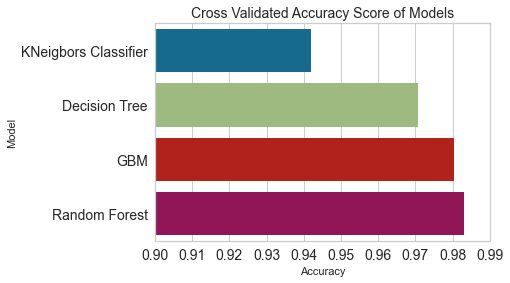

In [111]:
compare = pd.DataFrame({"Model": ["GBM", "KNeigbors Classifier","Random Forest", "Decision Tree"],
                        "Accuracy": [gbm_cv_accuracy_score, knn_cv_accuracy_score, rf_cv_accuracy_score, dt_cv_accuracy_score]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(6,4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Cross Validated Accuracy Score of Models", size=14)
ax.set_xlim(.90, .99);

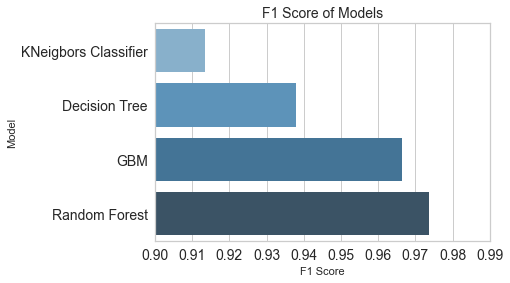

In [112]:
compare = pd.DataFrame({"Model": ["GBM", "KNeigbors Classifier","Random Forest", "Decision Tree"],
                        "F1 Score": [gbm_f1, knn_f1, rf_f1, dt_f1]})
compare = compare.sort_values(by="F1 Score", ascending=True)
plt.figure(figsize=(6,4))
ax = sns.barplot(x="F1 Score", y="Model", data=compare, palette="Blues_d")
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("F1 Score of Models", size=14)
ax.set_xlim(.90, .99);

## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Model as .pkl

### Save and Export Variables as .pkl

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___